In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV
import itertools

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(df, test_size=0.30, random_state=123)
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

1.1 train_df.describe() gives us a statistic summary of all columns in the train dataframe.

In [5]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


1.2 From train_df.info(), we can see that there's no missing value in the dataframe, and we know the data size and the data types of all columns. 

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

2.1 two summary statistics
- Filter on 'AGE' column and apply mean() on it, we can know the average age of the people in the dataset is 35.5
- Similarly, we find out the median credit limit in the dataset is $140,000.

In [7]:
mean_age = train_df['AGE'].mean()
print("Mean Age:\n", mean_age)

Mean Age:
 35.50080952380952


In [8]:
median_limit_bal = train_df['LIMIT_BAL'].median()
print("Median Credit Limit (LIMIT_BAL):\n", median_limit_bal)

Median Credit Limit (LIMIT_BAL):
 140000.0


2.2 This histogram shows the distribution of credit limits in the training dataset, which helps us understand the general range and concentration of credit limits.

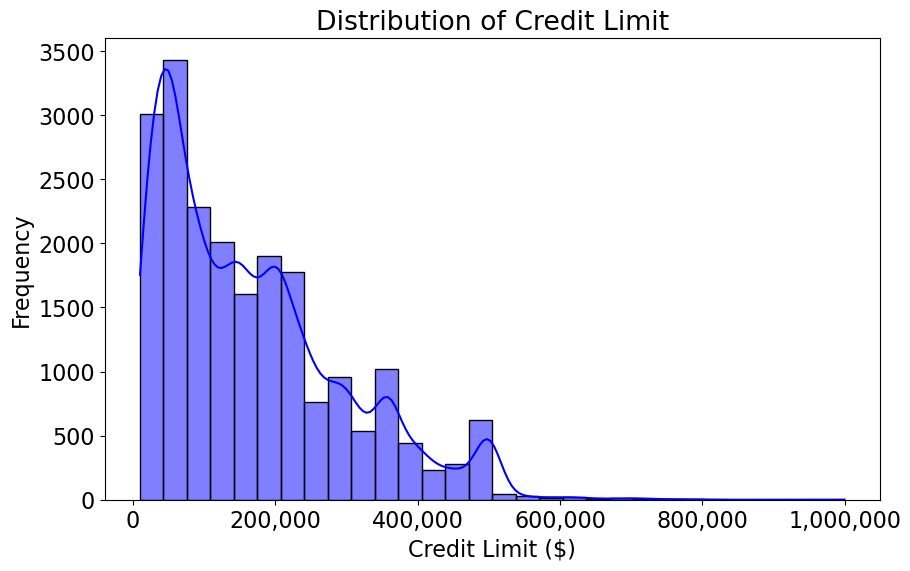

In [9]:
import seaborn as sns
import matplotlib.ticker as mtick

# Visualization 1: Distribution of 'LIMIT_BAL' (Credit Limit)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['LIMIT_BAL'], kde=True, bins=30, color='blue')
plt.xlabel('Credit Limit ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Limit')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

2.2 This count plot shows the distribution of credit card defaults across different education levels. It provides insights into which education levels are associated with higher or lower default rates.

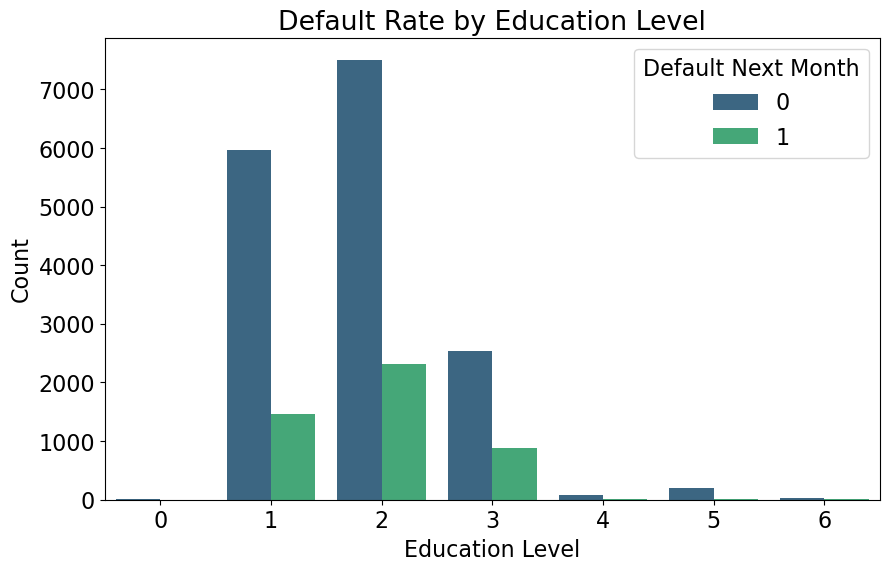

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='EDUCATION', hue='default.payment.next.month', palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Default Rate by Education Level')
plt.legend(title='Default Next Month', loc='upper right')
plt.show()

3. Initial Observations
- The distribution of credit limits shows that most clients have credit limits between below 200,000.
- There are clients with very high credit limits, but these are relatively rare, indicating that credit limit data is skewed.
- The mean age of clients is approximately 35.5 years, suggesting that the dataset primarily includes middle-aged individuals.
- The median credit limit is 140,000, indicating that half of the clients have credit limits below this value.
- Default rates seem to vary by education level, with some education levels exhibiting higher default frequencies.
- There are no missing values in the dataset, which makes data preprocessing simpler.

4. In this case, if default is positive, then false negative cases(when they are default but we recognize them as not-default) are more detrimental. We should use Recall as our metric because Recall measures the proportion of actual positives that are correctly identified by the model. A high recall indicates that the model is catching most of the true positives (default recognized correctly), minimizing the number of false negatives. 

In [11]:
from sklearn.metrics import recall_score, make_scorer
recall_scorer = make_scorer(recall_score, greater_is_better=True)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [12]:
# 1. Creating Worst payment delay
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train_df['worst_payment_delay'] = train_df[payment_cols].max(axis=1)

# 2. Creating Bill Amount Features
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
 # Average bill amount
train_df['avg_bill_amt'] = train_df[bill_cols].mean(axis=1)

# 3. Creating Payment Amount Features
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# Average payment amount
train_df['avg_payment_amt'] = train_df[pay_cols].mean(axis=1)

# 4. Payment Ratio Features
    
# Calculate payment ratios for each month
for i in range(1, 7):
    bill_col = f'BILL_AMT{i}'
    pay_col = f'PAY_AMT{i}'
    ratio_col = f'payment_ratio_{i}'
    train_df[ratio_col] = train_df[pay_col] / train_df[bill_col].replace(0, 1)
    
# Average payment ratio
ratio_cols = [f'payment_ratio_{i}' for i in range(1, 7)]
train_df['avg_payment_ratio'] = train_df[ratio_cols].mean(axis=1)
# Only keep average payment ratio
train_df = train_df.drop(columns=ratio_cols)
    
# 5. Credit Utilization Features
    
# Average credit utilization over 6 months
train_df['avg_credit_utilization'] = (train_df[bill_cols].mean(axis=1) / train_df['LIMIT_BAL'])

train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,worst_payment_delay,avg_bill_amt,avg_payment_amt,avg_payment_ratio,avg_credit_utilization
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,1000.0,3000.0,0.0,7013.0,0,0,19868.833333,3505.166667,0.398573,0.062090
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,130007.0,3018.0,15000.0,51663.0,0,0,88137.666667,47954.333333,24.280495,0.200313
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0,-2,-18.000000,0.000000,0.000000,-0.000112
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,4204.0,3017.0,2005.0,1702.0,0,0,88447.000000,3356.000000,0.037254,0.737058
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,1200.0,1500.0,1000.0,1500.0,0,2,34180.166667,1100.000000,0.036504,0.683603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,1242.0,1900.0,0.0,3000.0,0,2,14478.166667,1441.000000,0.099916,0.038100
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,2580.0,0.0,6941.0,0.0,0,1,2016.833333,1586.833333,430.448385,0.005602
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,1530.0,1000.0,327.0,329.0,1,0,33267.500000,1198.000000,0.035902,0.665350
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,2000.0,1765.0,331.0,0.0,0,0,27202.333333,1349.333333,0.046154,0.906744


In [13]:
# 1. Creating Worst payment delay
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
test_df['worst_payment_delay'] = test_df[payment_cols].max(axis=1)

# 2. Creating Bill Amount Features
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
 # Average bill amount
test_df['avg_bill_amt'] = test_df[bill_cols].mean(axis=1)

# 3. Creating Payment Amount Features
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# Average payment amount
test_df['avg_payment_amt'] = test_df[pay_cols].mean(axis=1)

# 4. Payment Ratio Features
    
# Calculate payment ratios for each month
for i in range(1, 7):
    bill_col = f'BILL_AMT{i}'
    pay_col = f'PAY_AMT{i}'
    ratio_col = f'payment_ratio_{i}'
    test_df[ratio_col] = test_df[pay_col] / test_df[bill_col].replace(0, 1)
    
# Average payment ratio
ratio_cols = [f'payment_ratio_{i}' for i in range(1, 7)]
test_df['avg_payment_ratio'] = test_df[ratio_cols].mean(axis=1)
# Only keep average payment ratio
test_df = test_df.drop(columns=ratio_cols)
    
# 5. Credit Utilization Features
    
# Average credit utilization over 6 months
test_df['avg_credit_utilization'] = (test_df[bill_cols].mean(axis=1) / test_df['LIMIT_BAL'])

test_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,worst_payment_delay,avg_bill_amt,avg_payment_amt,avg_payment_ratio,avg_credit_utilization
25665,25666,40000.0,2,2,2,26,-1,0,0,0,...,0.0,22373.0,680.0,10000.0,0,0,21617.166667,5892.166667,3728.939355,0.540429
16464,16465,80000.0,2,3,1,59,0,0,0,0,...,2000.0,1603.0,1903.0,2006.0,0,0,58270.166667,2138.333333,0.036660,0.728377
22386,22387,170000.0,2,1,2,30,2,2,2,2,...,0.0,13000.0,5500.0,1000.0,1,2,162134.833333,5466.666667,0.034269,0.953734
10149,10150,200000.0,2,2,1,41,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,1,-2,4050.833333,123.666667,0.005247,0.020254
8729,8730,50000.0,1,2,1,43,0,0,0,0,...,331.0,341.0,356.0,330.0,0,0,8925.166667,608.000000,0.071268,0.178503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548,17549,60000.0,2,2,1,48,0,0,0,0,...,1400.0,600.0,1000.0,1000.0,1,0,39950.666667,1350.000000,0.039329,0.665844
11459,11460,310000.0,1,2,1,43,-1,-1,-1,-1,...,2018.0,2505.0,816.0,3052.0,0,-1,2502.500000,2190.333333,1.269155,0.008073
6608,6609,10000.0,2,2,2,22,0,0,0,0,...,1000.0,1535.0,0.0,1000.0,0,2,8336.833333,1017.000000,0.132148,0.833683
2414,2415,30000.0,1,2,1,38,1,-1,-1,-1,...,2713.0,0.0,0.0,0.0,1,1,1443.333333,1443.333333,380.557872,0.048111


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [14]:
numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                      'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                   'worst_payment_delay', 'avg_bill_amt','avg_payment_amt',	'avg_payment_ratio', 'avg_credit_utilization']
categorical_features = ['EDUCATION','MARRIAGE']
binary_features = ['SEX']
drop_features = ['ID']
target = "default.payment.next.month"

In [15]:
numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary',dtype = int)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary',dtype = int)
)

In [16]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ('drop', drop_features),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6', 'worst_payment_delay',
                                  'avg_bill_amt', 'avg_payment_amt',
                                  'avg_payment_ratio',
                                  'av...
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>,
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['SEX']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['EDUCATION', 'MARRIAGE']),
                                ('drop', 'drop', ['ID'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [17]:
X_train = train_df.drop(["default.payment.next.month"], axis=1)
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(["default.payment.next.month"], axis=1)
y_test = test_df["default.payment.next.month"]

In [18]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [19]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_scores = mean_std_cross_val_scores(dummy_clf, X_train, y_train, return_train_score=True, scoring = recall_scorer)
dummy_scores = pd.DataFrame(dummy_scores).T
dummy_scores.index = ['dummy']
dummy_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

1. We use a logistic regression model with balanced class weights as our first real attempt.

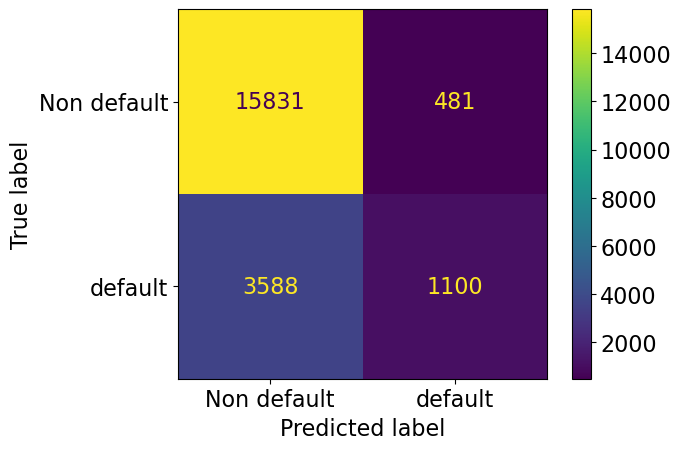

In [20]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=2000)
)
pipe_lr.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(
    pipe_lr,
    X_train,
    y_train,
    display_labels=["Non default", "default"],
    values_format="d",
);

In [21]:
lr_results = mean_std_cross_val_scores(pipe_lr, X_train, y_train, return_train_score=True, scoring = recall_scorer)
lr_results = pd.DataFrame(lr_results).T
lr_results.index = ['Logistic regression']
lr_results

,fit_time,score_time,test_score,train_score
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)


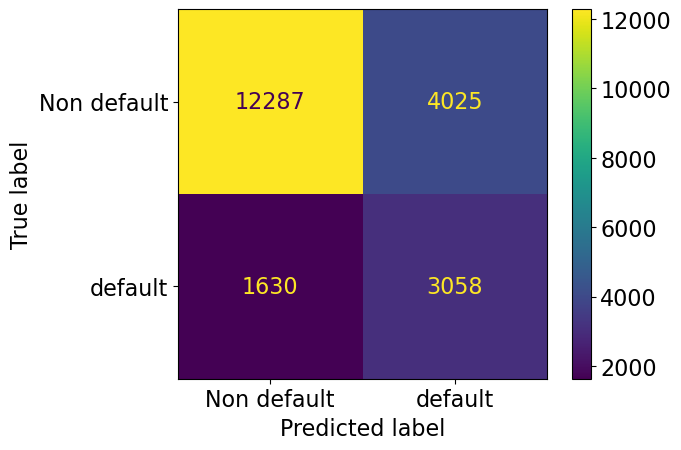

In [22]:
pipe_lr_balanced = make_pipeline(
    preprocessor, LogisticRegression(max_iter=2000, class_weight="balanced") #This sets the weights so that classes are equal. False nagtives are reduced.
)
pipe_lr_balanced.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(
    pipe_lr_balanced,
    X_train,
    y_train,
    display_labels=["Non default", "default"],
    values_format="d",
);

In [23]:
lr_balanced_results = mean_std_cross_val_scores(pipe_lr_balanced, X_train, y_train, return_train_score=True, scoring = recall_scorer)
lr_balanced_results = pd.DataFrame(lr_balanced_results).T
lr_balanced_results.index = ['Logistic regression_Balanced']
lr_balanced_results

,fit_time,score_time,test_score,train_score
Logistic regression_Balanced,0.043 (+/- 0.001),0.003 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)


2. Hyperparameter Optimization

In [24]:
from scipy.stats import expon, lognorm, loguniform, randint, uniform, norm, randint

param_grid = {
    "logisticregression__C": loguniform(1e-3, 1e3),
}

# Create a random search object
random_search = RandomizedSearchCV(pipe_lr_balanced,                                    
                  param_distributions = param_grid, 
                  n_iter=100, 
                  n_jobs=-1, 
                  return_train_score=True,
                  scoring = recall_scorer)

# Carry out the search
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'worst_payme...
                                                                               ['EDUCATION',
                                                                                'MARRIAGE']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['ID'])])),
                                             ('logisticregression',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=2000))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16802eae0>},
                   return_train_score=True,
                   scoring=make_scorer(recall_score, response_method='predict'))

In [25]:
random_search.best_score_

0.6535795636848537

In [26]:
random_search.best_params_

{'logisticregression__C': 53.44910517342665}

3. Report cross-validation scores along with standard deviation.

In [27]:
lr_balanced_results = mean_std_cross_val_scores(pipe_lr_balanced, X_train, y_train, return_train_score=True, scoring = recall_scorer)
lr_balanced_results = pd.DataFrame(lr_balanced_results).T
lr_balanced_results.index = ['Logistic regression_Balanced']
lr_balanced_results

,fit_time,score_time,test_score,train_score
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)


In [28]:
pipe_lr_balanced_tuned = random_search.best_estimator_

mean_std_scores = mean_std_cross_val_scores(pipe_lr_balanced_tuned, X_train, y_train, cv=5, return_train_score=True, scoring = recall_scorer)

lr_balanced_tuned = pd.DataFrame(mean_std_scores).T
lr_balanced_tuned.index = ['LR_Balanced_Tuned']
lr_balanced_tuned

,fit_time,score_time,test_score,train_score
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)


4. Summary:
- Because there is a class imbalance so we used logistic regression with equal class wight to find out that the result of logistic regression model (average recall cv score = 0.653) is better than dummy classifier (cv = 0.222).
- With hyperparameter optimization, we find best cv score is 0.654, which is almost the same as the model using default C value. This might be caused by the insensitivity to C of the model.
- cv score and train score are low and close in value, indicating underfitting in logistic regression model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

### Overfitting/Underfitting:

- **Random Forest**: The model is **overfitting**. Its training score is perfect (1.000), indicating that it fits the training data almost too well. However, the test score (0.341) is significantly lower, which means it does not generalize well to unseen data. This suggests overfitting.
  
- **K-Nearest Neighbors (KNN)**: The KNN model shows a relatively low training score (0.472) and an even lower test score (0.363). While the test score being lower than the training score typically suggests overfitting, in this case, the low training score indicates that the model is **underfitting** because of the high training error. This issue may caused by the class imbalance in the dataset. KNN might struggle more because it's a distance-based algorithm. With imbalanced data, KNN tends to get biased toward the majority class, making it harder for it to generalize well. This imbalance can cause the model to perform poorly on minority classes, further contributing to its underfitting.

- **LightGBM**: There is a moderate case of **underfitting**. The training score is 0.457 and the test score is 0.375, which are both similar but fairly low. This suggests that the model is not learning enough complexity from the training data, possibly underfitting.

- **LightGBM (balanced)**: This model seems to achieve better **balance**, as it avoids extreme overfitting. The test score (0.620) is relatively high, and the training score (0.788) indicates a good fit on the training data without being perfect. This makes it the most generalizable model in this set.

### Fit and Score Times:

- **Random Forest** has a much higher fit time (2.929 seconds) compared to the other models, suggesting it is computationally expensive. The score time (0.043 seconds) is comparable to KNN, but still quite fast.
  
- **KNN** has the fastest fit time (0.010 seconds), making it computationally efficient. Its score time (0.050 seconds) is slightly higher than LightGBM but still very quick.

- **LightGBM** is very efficient with a fit time of 0.261 seconds, much lower than Random Forest. Its score time (0.008 seconds) is also the quickest among all the models.

- **LightGBM (balanced)** has a very similar fit time (0.256 seconds) and score time (0.007 seconds) to the unbalanced version, making it equally efficient in computation.

### Comparison to Logistic Regression:

- **Logistic Regression (0.238)**: This is lower than all models except KNN, indicating that KNN slightly outperforms logistic regression but still underfits.
  
- **Balanced Logistic Regression (0.653)**: This model outperforms **all** models except the balanced LightGBM, which comes close at 0.620. The balanced logistic regression still holds a slight edge.

### Conclusion:

- We are able to beat the **vanilla logistic regression** with the LightGBM models in terms of cv score. However, the **balanced logistic regression** still outperforms the LightGBM models slightly.
- Among the tree-based models, **LightGBM (balanced)** seems to provide the best trade-off between fit, generalization, and computational efficiency.

In [29]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier


pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(class_weight="balanced", random_state=123)
)
pipe_knn = make_pipeline(
    preprocessor, KNeighborsClassifier()
)
pipe_lgbm = make_pipeline(
    preprocessor, LGBMClassifier(random_state=123, verbose=-1)
)
pipe_lgbm_balanced = make_pipeline(
    preprocessor, LGBMClassifier(random_state=123, verbose=-1, class_weight="balanced")
)

classifiers = {
    "random forest": pipe_rf,
    'K-Nearest Neighbors': pipe_knn,
    "LightGBM": pipe_lgbm,
    "LightGBM_balanced": pipe_lgbm_balanced
}

In [30]:
import warnings

warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [31]:
results = {}
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring = recall_scorer
    )

In [32]:
rf_knn_lgbm_scores = pd.DataFrame(results).T
rf_knn_lgbm_scores

,fit_time,score_time,test_score,train_score
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

The results does not really improve with feature selection, as the balanced logistic regression model with selected features (0.654) has the same test score as the one without selected features (0.654). But the fit time is faster. This may be caused by the small number of features. 

In [33]:
from sklearn.feature_selection import RFE

# Get preprocessed data from the tuned pipeline
X_train_processed = pipe_lr_balanced_tuned.named_steps['columntransformer'].transform(X_train)
X_test_processed = pipe_lr_balanced_tuned.named_steps['columntransformer'].transform(X_test)

# Get feature names from the tuned pipeline
numeric_feature_names = numeric_features
binary_feature_names = pipe_lr_balanced_tuned.named_steps['columntransformer'].named_transformers_['onehotencoder'].get_feature_names_out(binary_features)
categorical_feature_names = pipe_lr_balanced_tuned.named_steps['columntransformer'].named_transformers_['pipeline'].named_steps['onehotencoder'].get_feature_names_out(categorical_features)
all_feature_names = list(itertools.chain(numeric_feature_names, binary_feature_names, categorical_feature_names))

rfe_cv = RFECV(
    estimator=pipe_lr_balanced_tuned.named_steps['logisticregression'],
    cv=10,
    scoring=recall_scorer,
    min_features_to_select= 5
)

# Fit RFECV
rfe_cv.fit(X_train_processed, y_train)

# Get selected features
selected_features_mask = rfe_cv.support_
selected_feature_names = [name for name, selected in zip(all_feature_names, selected_features_mask) if selected]

# Create DataFrames with selected features
X_train_selected_df = pd.DataFrame(
    X_train_processed[:, selected_features_mask],
    columns=selected_feature_names
)
X_test_selected_df = pd.DataFrame(
    X_test_processed[:, selected_features_mask],
    columns=selected_feature_names
)

selected_model = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    C=pipe_lr_balanced_tuned.named_steps['logisticregression'].C  # Use the same C value as tuned model
)
mean_std_scores_selected = mean_std_cross_val_scores(
    selected_model,
    X_train_selected_df,
    y_train,
    cv=5,
    return_train_score=True,
    scoring=recall_scorer
)

lr_scores_bal_selected = pd.DataFrame(mean_std_scores_selected).T
lr_scores_bal_selected.index = ['LR_Balanced_Selected']
lr_scores_bal_selected

,fit_time,score_time,test_score,train_score
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)


In [34]:
# Create a pipeline that combines preprocessing and selected features with the model
pipe_lr_selected = Pipeline([
    ('columntransformer', pipe_lr_balanced_tuned.named_steps['columntransformer']), 
    ('feature_selector', RFECV(
        estimator=LogisticRegression(max_iter=2000, class_weight="balanced", C=pipe_lr_balanced_tuned.named_steps['logisticregression'].C),
        cv=10,
        scoring=recall_scorer,
        min_features_to_select=5
    )),
    ('logisticregression', LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        C=pipe_lr_balanced_tuned.named_steps['logisticregression'].C
    ))
])

# Fit the pipeline
pipe_lr_selected.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'worst_payment_delay',
                                                   'avg_bill_amt',
                                                   'avg...
                                                  ['EDUCATION', 'MARRIAGE']),
                                                 ('drop', 'drop', ['ID'])])),
                ('feature_selector',
                 RFECV(cv=10,
                       estimator=LogisticRegression(C=53.44910517342665,
                                                    class_weight='balanced',
                                                    max_iter=2000),
                       min_features_to_select=5,
                       scoring=make_scorer(recall_score, response_method='predict'))),
                ('logisticregression',
                 LogisticRegression(C=53.44910517342665,
                                    class_weight='balanced', max_iter=2000))])

In [35]:
combined_scores = pd.concat([dummy_scores, lr_results, lr_balanced_results, lr_balanced_tuned, rf_knn_lgbm_scores, lr_scores_bal_selected])
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [36]:
X_train_selected_df.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT5,PAY_0,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,...,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_3
0,1.168355,-0.300665,-0.293394,-0.265310,-0.494781,0.013770,-0.039546,-0.040229,-0.234603,-0.114944,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.090017,-0.685307,-0.679495,0.585444,1.805461,-0.878738,-0.297166,3.739796,6.785208,-0.113778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.060527,-0.696132,-0.688319,-0.681234,-0.661045,-1.771246,-0.333097,-0.270403,-0.289017,-0.309323,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.367748,0.687456,0.752583,0.835581,0.501203,0.013770,-0.115517,-0.018028,-0.060260,-0.113843,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.905384,-0.040230,-0.031399,-0.287429,-0.204599,0.906278,-0.333097,-0.206185,-0.223720,-0.212134,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Random Forest Hyperparameter Optimization
#With selected features
from sklearn.pipeline import make_pipeline

pipe_rf_1 = make_pipeline(
    RandomForestClassifier(class_weight="balanced", random_state=123)
)

param_distributions_rf = {
    'randomforestclassifier__n_estimators': randint(50, 500),  # Randomly select from 50 to 500 estimators
    'randomforestclassifier__max_depth': randint(5, 50)  # Randomly select max depth between 5 and 50
}

# Create and fit GridSearchCV
rd_rf = RandomizedSearchCV(pipe_rf_1, 
                    param_distributions=param_distributions_rf, 
                    cv=5, 
                    n_jobs=-1, 
                    return_train_score=True,
                    scoring = recall_scorer)

# Fit the pipeline on the original training data (not the transformed one)
rd_rf.fit(X_train_selected_df, y_train)
print("Best parameters for Random Forest:", rd_rf.best_params_)
print("Best cross-validation score for Random Forest:", rd_rf.best_score_)

Best parameters for Random Forest: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__n_estimators': 230}
Best cross-validation score for Random Forest: 0.48698677674290536


In [38]:
# Step 1: Extract the best parameters
best_params = rd_rf.best_params_

# Create a new RandomForestClassifier using the best parameters
best_rf_selected = RandomForestClassifier(
    n_estimators=best_params['randomforestclassifier__n_estimators'],
    max_depth=best_params['randomforestclassifier__max_depth'],
    class_weight="balanced",
    random_state=123
)


mean_std_scores = mean_std_cross_val_scores(best_rf_selected, X_train_selected_df, y_train, cv=5, return_train_score=True, scoring = recall_scorer)

random_forest_selected = pd.DataFrame(mean_std_scores).T
random_forest_selected.index = ['Random Forest Selected (Tuned)']
random_forest_selected
combined_scores = pd.concat([combined_scores, random_forest_selected])
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


In [39]:
#Random Forest Hyperparameter Optimization
#Without selected features
from sklearn.pipeline import make_pipeline

pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(class_weight="balanced", random_state=123)
)

param_distributions_rf = {
    'randomforestclassifier__n_estimators': randint(50, 500),  # Randomly select from 50 to 500 estimators
    'randomforestclassifier__max_depth': randint(5, 50)  # Randomly select max depth between 5 and 50
}

# Create and fit GridSearchCV
rd_rf = RandomizedSearchCV(pipe_rf, 
                    param_distributions=param_distributions_rf, 
                    cv=5, 
                    n_jobs=-1, 
                    return_train_score=True,
                    scoring = recall_scorer)

# Fit the pipeline on the original training data (not the transformed one)
rd_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", rd_rf.best_params_)
print("Best cross-validation score for Random Forest:", rd_rf.best_score_)

Best parameters for Random Forest: {'randomforestclassifier__max_depth': 7, 'randomforestclassifier__n_estimators': 419}
Best cross-validation score for Random Forest: 0.6072920198519524


In [40]:
# Create a new RandomForestClassifier using the best parameters
best_rf_unselected = rd_rf.best_estimator_

mean_std_scores = mean_std_cross_val_scores(best_rf_unselected, X_train, y_train, cv=5, return_train_score=True, scoring = recall_scorer)

random_forest_unselected = pd.DataFrame(mean_std_scores).T
random_forest_unselected.index = ['Random Forest Unselected (Tuned)']
random_forest_unselected
combined_scores = pd.concat([combined_scores, random_forest_unselected])
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


In [41]:
#KNN Hyperparameter Optimization
#With selected features
pipe_knn_1 = make_pipeline(
    KNeighborsClassifier()
)

param_distributions_knn = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 20, 2)
}

rs_knn = RandomizedSearchCV(pipe_knn_1, 
                            param_distributions=param_distributions_knn, 
                            n_iter=10, 
                            cv=5, 
                            n_jobs=-1, 
                            random_state=123, 
                            return_train_score=True,
                            scoring = recall_scorer)
rs_knn.fit(X_train_selected_df, y_train)

print("Best parameters for K-Nearest Neighbors:", rs_knn.best_params_)
print("Best cross-validation score for K-Nearest Neighbors:", rs_knn.best_score_)

Best parameters for K-Nearest Neighbors: {'kneighborsclassifier__n_neighbors': 1}
Best cross-validation score for K-Nearest Neighbors: 0.399527139421053


In [42]:
# Step 1: Extract the best parameters
best_knn_selected = rs_knn.best_estimator_

mean_std_scores = mean_std_cross_val_scores(best_knn_selected, X_train_selected_df, y_train, cv=5, return_train_score=True, scoring = recall_scorer)

knn_selected = pd.DataFrame(mean_std_scores).T
knn_selected.index = ['KNN Selected (Tuned)']
knn_selected
combined_scores = pd.concat([combined_scores, knn_selected])
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


In [43]:
#KNN Hyperparameter Optimization
#Without selected features
pipe_knn = make_pipeline(
    preprocessor, KNeighborsClassifier()
)

param_distributions_knn = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 20, 2)
}

rs_knn = RandomizedSearchCV(pipe_knn, 
                            param_distributions=param_distributions_knn, 
                            n_iter=10, 
                            cv=5, 
                            n_jobs=-1, 
                            random_state=123, 
                            return_train_score=True,
                            scoring = recall_scorer)
rs_knn.fit(X_train, y_train)

print("Best parameters for K-Nearest Neighbors:", rs_knn.best_params_)
print("Best cross-validation score for K-Nearest Neighbors:", rs_knn.best_score_)

Best parameters for K-Nearest Neighbors: {'kneighborsclassifier__n_neighbors': 1}
Best cross-validation score for K-Nearest Neighbors: 0.3937690720054249


In [44]:
# Step 1: Extract the best parameters
best_knn_unselected = rs_knn.best_estimator_

mean_std_scores = mean_std_cross_val_scores(best_knn_unselected, X_train, y_train, cv=5, return_train_score=True, scoring = recall_scorer)

knn_unselected = pd.DataFrame(mean_std_scores).T
knn_unselected.index = ['KNN Unselected (Tuned)']
knn_unselected
combined_scores = pd.concat([combined_scores, knn_unselected])
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


In [45]:
#LGBM Hyperparameter Optimization
#Unbalanced
#With selected features
pipe_lgbm_1 = Pipeline([
    ('classifier', LGBMClassifier(random_state=123))
])

param_distributions_lgbm = {
    'classifier__n_estimators': np.arange(50, 401, 10)
}

rs_lgbm = RandomizedSearchCV(pipe_lgbm_1, 
                             param_distributions=param_distributions_lgbm, 
                             n_iter=10, 
                             cv=5, 
                             n_jobs=-1, 
                             random_state=123, 
                             return_train_score=True,
                             scoring = recall_scorer)
rs_lgbm.fit(X_train_selected_df, y_train)

print("Best parameters for LightGBM:", rs_lgbm.best_params_)
print("Best cross-validation score for LightGBM:", rs_lgbm.best_score_)

Best parameters for LightGBM: {'classifier__n_estimators': 160}
Best cross-validation score for LightGBM: 0.3602799389240715


In [46]:
# Step 1: Extract the best parameters
best_lgbm_unbalanced_selected = rs_lgbm.best_estimator_

mean_std_scores = mean_std_cross_val_scores(best_lgbm_unbalanced_selected, X_train_selected_df, y_train, cv=5, return_train_score=True, scoring = recall_scorer)

lgbm_unbalanced_selected = pd.DataFrame(mean_std_scores).T
lgbm_unbalanced_selected.index = ['LGBM Unbalanced Selected (Tuned)']
lgbm_unbalanced_selected
combined_scores = pd.concat([combined_scores, lgbm_unbalanced_selected])
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


In [47]:
#LGBM Hyperparameter Optimization
#Unbalanced
#Without selected features
pipe_lgbm_unbalanced = make_pipeline(
    preprocessor, LGBMClassifier(random_state=123, verbose=-1)
)

param_distributions_lgbm = {
    'lgbmclassifier__n_estimators': np.arange(50, 401, 10)
}

rs_lgbm_unbalanced = RandomizedSearchCV(pipe_lgbm_unbalanced, 
                             param_distributions=param_distributions_lgbm, 
                             n_iter=10, 
                             cv=5, 
                             n_jobs=-1, 
                             random_state=123, 
                             return_train_score=True,
                             scoring = recall_scorer)
rs_lgbm_unbalanced.fit(X_train, y_train)

print("Best parameters for LightGBM:", rs_lgbm_unbalanced.best_params_)
print("Best cross-validation score for LightGBM:", rs_lgbm_unbalanced.best_score_)

Best parameters for LightGBM: {'lgbmclassifier__n_estimators': 100}
Best cross-validation score for LightGBM: 0.3752112285045272


In [48]:
# Step 1: Extract the best parameters
best_lgbm_unselected_unbalanced = rs_lgbm_unbalanced.best_estimator_

mean_std_scores = mean_std_cross_val_scores(best_lgbm_unselected_unbalanced, X_train, y_train, cv=5, return_train_score=True, scoring = recall_scorer)

lgbm_unselected_unbalanced = pd.DataFrame(mean_std_scores).T
lgbm_unselected_unbalanced.index = ['LGBM Unbalanced Unselected (Tuned)']
lgbm_unselected_unbalanced
combined_scores = pd.concat([combined_scores, lgbm_unselected_unbalanced])
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


In [49]:
#LGBM Hyperparameter Optimization
#Balanced
#With selected features
pipe_lgbm_balanced_selected = Pipeline([
    ('classifier', LGBMClassifier(random_state=123, verbose=-1, class_weight="balanced"))
])

param_distributions_lgbm = {
    'classifier__n_estimators': np.arange(50, 401, 10)
}

rs_lgbm_balanced_selected = RandomizedSearchCV(pipe_lgbm_balanced_selected, 
                             param_distributions=param_distributions_lgbm, 
                             n_iter=10, 
                             cv=5, 
                             n_jobs=-1, 
                             random_state=123, 
                             return_train_score=True,
                             scoring = recall_scorer)
rs_lgbm_balanced_selected.fit(X_train_selected_df, y_train)

print("Best parameters for LightGBM:", rs_lgbm_balanced_selected.best_params_)
print("Best cross-validation score for LightGBM:", rs_lgbm_balanced_selected.best_score_)

Best parameters for LightGBM: {'classifier__n_estimators': 100}
Best cross-validation score for LightGBM: 0.6245696354331407


In [50]:
# Step 1: Extract the best parameters
best_lgbm_selected_balanced = rs_lgbm_balanced_selected.best_estimator_

mean_std_scores = mean_std_cross_val_scores(best_lgbm_selected_balanced, X_train_selected_df, y_train, cv=5, return_train_score=True, scoring = recall_scorer)

lgbm_selected_balanced = pd.DataFrame(mean_std_scores).T
lgbm_selected_balanced.index = ['LGBM Balanced Selected (Tuned)']
lgbm_selected_balanced
combined_scores = pd.concat([combined_scores, lgbm_selected_balanced])
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


In [51]:
#LGBM Hyperparameter Optimization
#Balanced
#Without Selected features
pipe_lgbm_balanced_unselected = make_pipeline(
    preprocessor, LGBMClassifier(random_state=123, verbose=-1, class_weight="balanced")
)

param_distributions_lgbm = {
    'lgbmclassifier__n_estimators': np.arange(50, 401, 10)
}

rs_lgbm_balanced_unselected = RandomizedSearchCV(pipe_lgbm_balanced_unselected, 
                             param_distributions=param_distributions_lgbm, 
                             n_iter=10, 
                             cv=5, 
                             n_jobs=-1, 
                             random_state=123, 
                             return_train_score=True,
                             scoring = recall_scorer)
rs_lgbm_balanced_unselected.fit(X_train, y_train)

print("Best parameters for LightGBM:", rs_lgbm_balanced_unselected.best_params_)
print("Best cross-validation score for LightGBM:", rs_lgbm_balanced_unselected.best_score_)

Best parameters for LightGBM: {'lgbmclassifier__n_estimators': 110}
Best cross-validation score for LightGBM: 0.6207269036734304


In [52]:
# Step 1: Extract the best parameters
best_lgbm_balanced_unselected = rs_lgbm_balanced_unselected.best_estimator_

mean_std_scores = mean_std_cross_val_scores(best_lgbm_balanced_unselected, X_train, y_train, cv=5, return_train_score=True, scoring = recall_scorer)

lgbm_balanced_unselected = pd.DataFrame(mean_std_scores).T
lgbm_balanced_unselected.index = ['LGBM Balanced Unselected (Tuned)']
lgbm_balanced_unselected
combined_scores = pd.concat([combined_scores, lgbm_balanced_unselected])
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

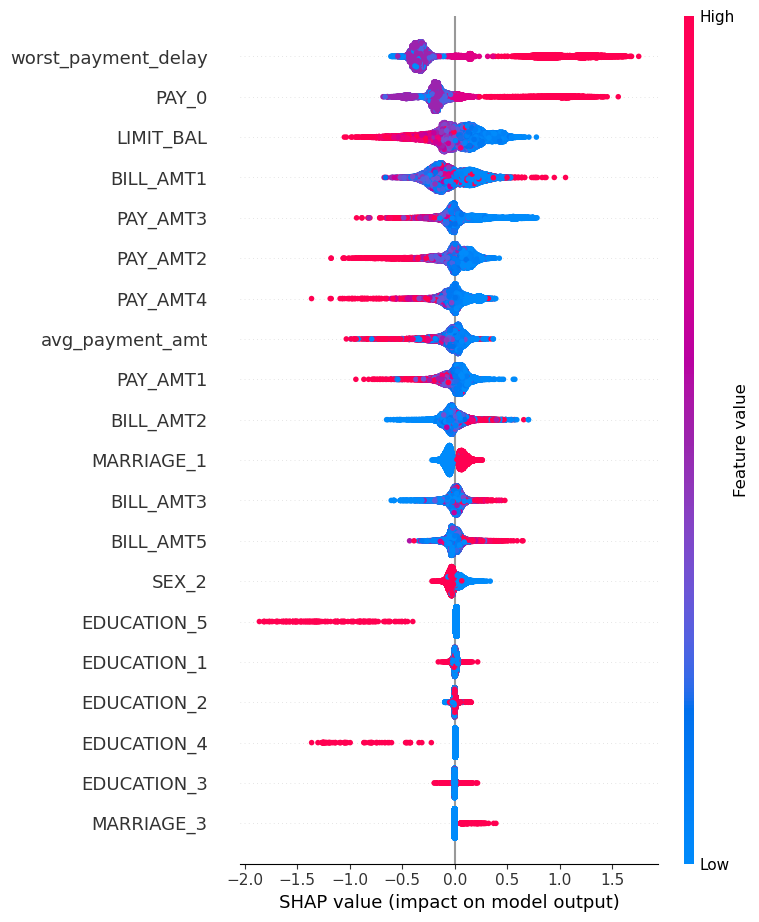

In [53]:
import shap

# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(best_lgbm_selected_balanced.named_steps['classifier'])

# Calculate SHAP values for the selected features
shap_values = explainer.shap_values(X_train_selected_df)

# Plot the SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_train_selected_df)

This summary plot shows the impact of features on predicting credit card default. Payment history features (worst_payment_delay, PAY_0) and credit limit (LIMIT_BAL) are the strongest predictors of default, with positive values indicating higher default risk. Education-related features have minimal influence on default probability.

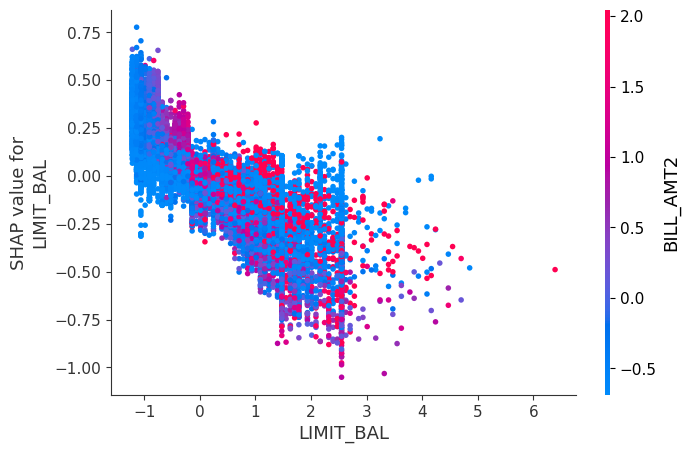

In [54]:
# Plot the SHAP dependence plot for the most important feature (for example, the feature at index 0)
shap.dependence_plot(0, shap_values, X_train_selected_df)

The scatter plot demonstrates that higher credit limits (LIMIT_BAL) are associated with lower default probability. The strongly negative SHAP values for high LIMIT_BAL suggest that customers with higher credit limits are less likely to default. However, this protective effect is somewhat weakened when customers also have high bill amounts (shown in red), demonstrating an interaction where the impact of credit limits on default prediction is moderated by billing amounts.

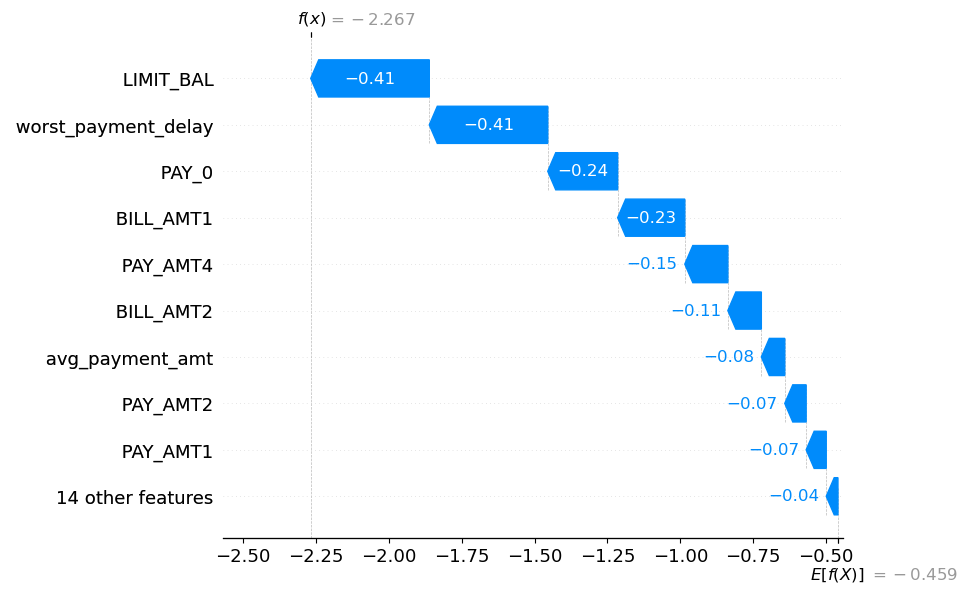

In [55]:
# Waterfall Plot
# Get SHAP values for the first instance in the training set
shap_values_instance = shap_values[0]
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values_instance, X_train_selected_df.iloc[0])

For this specific prediction (f(x) = -2.178, indicating low default probability), worst_payment_delay and LIMIT_BAL are the strongest contributors pushing towards non-default (-0.41 and -0.38 respectively). Other payment and bill amount features have smaller contributions but consistently suggest lower default risk.

In [56]:
# Force Plot
shap.initjs()
# Plot a force plot for the first instance
shap.force_plot(explainer.expected_value, shap_values_instance, X_train_selected_df.iloc[0])

This SHAP force plot shows how different features contribute to pushing the prediction from the base value (-0.457) to the final prediction (-2.18), which is a prediction of low probability of default. The length and direction of each segment represents a feature's impact - for example, worst_payment_delay (-0.3256) and LIMIT_BAL (1.168) have strong contributions pushing toward lower default risk, while other features like PAY_0 (0.01377) have smaller impacts. The blue segments push toward lower default probability (leftward) while red segments would push toward higher default probability (rightward), with the final prediction (-2.18) suggesting this customer has a very low risk of default.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

1. 

In [57]:
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


According to the test_score, the best performing model is LR_Balanced_Selected (Logistic regression with balanced after hyperparameter optimization and feature selection). 
It achieves one of the highest test scores (0.654 ± 0.012) and maintains consistent performance between training (0.654 ± 0.003) and test scores, indicating no overfitting. LR_Balanced_Selected is also very efficient, with low fit_time (0.027s) and score_time (0.001s), making it practical for deployment.

In [58]:
y_pred = pipe_lr_selected.predict(X_test)
y_pred_proba = pipe_lr_selected.predict_proba(X_test)[:, 1] 

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'micro' or 'macro' if it's a multi-class problem
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print("Test Accuracy: ", accuracy)
print("Test Precision: ", precision)
print("Test Recall: ", recall)
print("Test F1 Score: ", f1)
# print("Test AUC-ROC: ", auc_roc)

#print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy:  0.7207777777777777
Test Precision:  0.4087237479806139
Test Recall:  0.6493839835728953
Test F1 Score:  0.5016855046599247
Confusion Matrix:
[[5222 1830]
 [ 683 1265]]


2.
- The test recall of 0.648 shows strong agreement with our validation recall score of 0.654 ± 0.012, falling well within the expected range based on cross-validation results. This consistency between validation and test performance is a strong indicator that our model evaluation is reliable and our methodology was sound. While these scores might appear low at first glance, they are reasonable for credit default prediction given the inherent difficulty of predicting human financial behavior and the class imbalance in our data - our balanced model trades off some overall accuracy for better detection of defaults, as reflected in the lower precision (0.412) but higher recall (0.648).
- Several factors contribute to the trustworthiness of our results: we maintained proper separation of the test set throughout development, performed feature selection within the cross-validation loop, and saw consistent performance between training and validation sets (both around 0.654), showing the model found a good balance point for the problem's complexity rather than underfitting or overfitting.
- Optimization bias appears minimal as we followed good machine learning practices, including nested cross-validation for feature selection and hyperparameter tuning, and only used the test set once for final evaluation. The alignment between our validation estimates and final test performance, along with the confusion matrix showing meaningful predictions beyond majority class guessing, further supports that we avoided significant optimization bias in our model development process.

3. We take two predictions, with one predicted default and one predicted non-default.

Default Case (Prediction probability: 0.825)


<Figure size 1500x500 with 0 Axes>

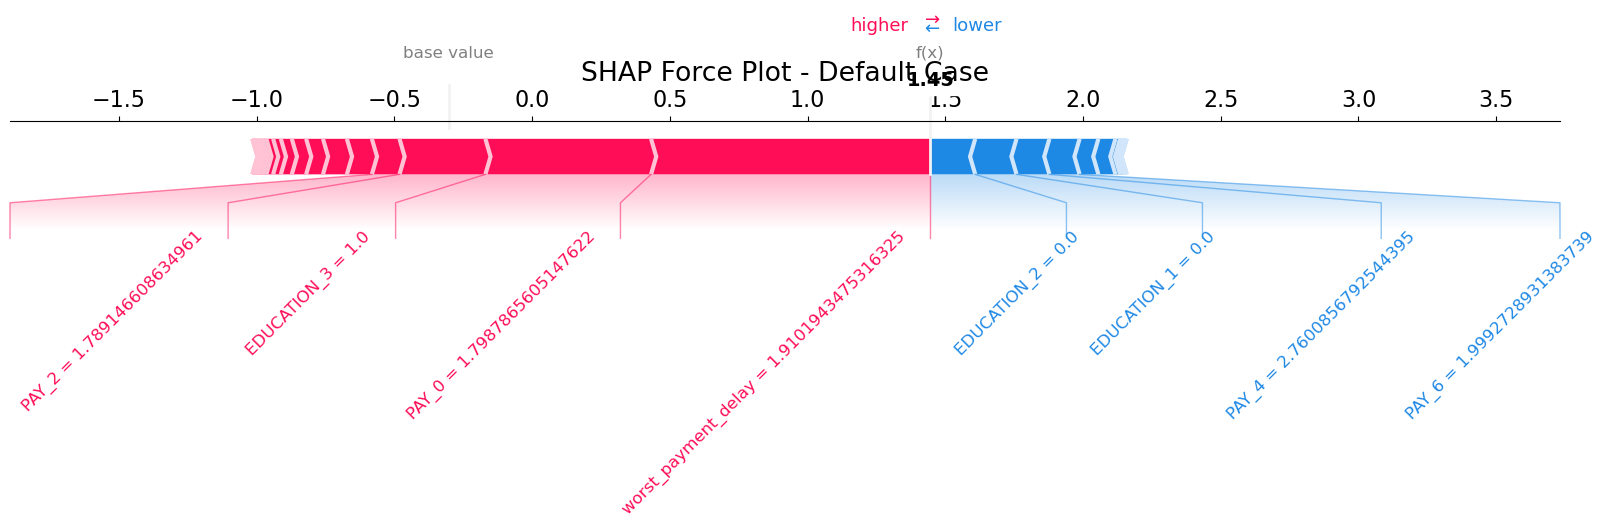

In [60]:
import shap
import numpy as np

# Extract and combine feature names
numeric_feature_names = numeric_features
binary_feature_names = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(binary_features)
categorical_feature_names = preprocessor.named_transformers_['pipeline'].named_steps['onehotencoder'].get_feature_names_out(categorical_features)
feature_names = list(numeric_feature_names) + list(binary_feature_names) + list(categorical_feature_names)

# Create explainer
lr_explainer = shap.LinearExplainer(
    pipe_lr_balanced_tuned.named_steps['logisticregression'],
    pipe_lr_balanced_tuned.named_steps['columntransformer'].transform(X_train)
)

# Transform test data
X_test_transformed = pipe_lr_balanced_tuned.named_steps['columntransformer'].transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Get SHAP values
shap_values = lr_explainer.shap_values(X_test_transformed)

# Find contrasting examples
default_indices = np.where((y_pred == 1) & (y_pred_proba > 0.7))[0]
default_idx = default_indices[0] if len(default_indices) > 0 else np.where(y_pred == 1)[0][0]

non_default_indices = np.where((y_pred == 0) & (y_pred_proba < 0.3))[0]
non_default_idx = non_default_indices[0] if len(non_default_indices) > 0 else np.where(y_pred == 0)[0][0]

# Plot default case
plt.figure(figsize=(15, 5))
print("Default Case (Prediction probability: {:.3f})".format(y_pred_proba[default_idx]))
shap.force_plot(
    lr_explainer.expected_value,
    shap_values[default_idx],
    X_test_transformed_df.iloc[default_idx],
    matplotlib=True,
    show=False,
    text_rotation=45,  # Rotate labels for better readability
    contribution_threshold=0.05  # Only show features with significant contributions
)
plt.title("SHAP Force Plot - Default Case")
plt.tight_layout()
plt.show()

This plot shows a prediction significantly towards default, with an f(x) value of 1.44 well above the base value. The most influential factors pushing towards default (red) are:

1. EDUCATION_3 = 1.0 indicates this education level increases default risk
2. PAY_0 ≈ 1.80 suggests recent payment delay issues
3. worst_payment_delay ≈ 1.91 shows a history of payment problems

Some features slightly decrease the default risk (blue):

1. EDUCATION_2 and EDUCATION_1 = 0.0 suggest other education levels are protective
2. PAY_4 and PAY_6 show improved payment behavior in those months


Non-Default Case (Prediction probability: 0.172)


<Figure size 1500x500 with 0 Axes>

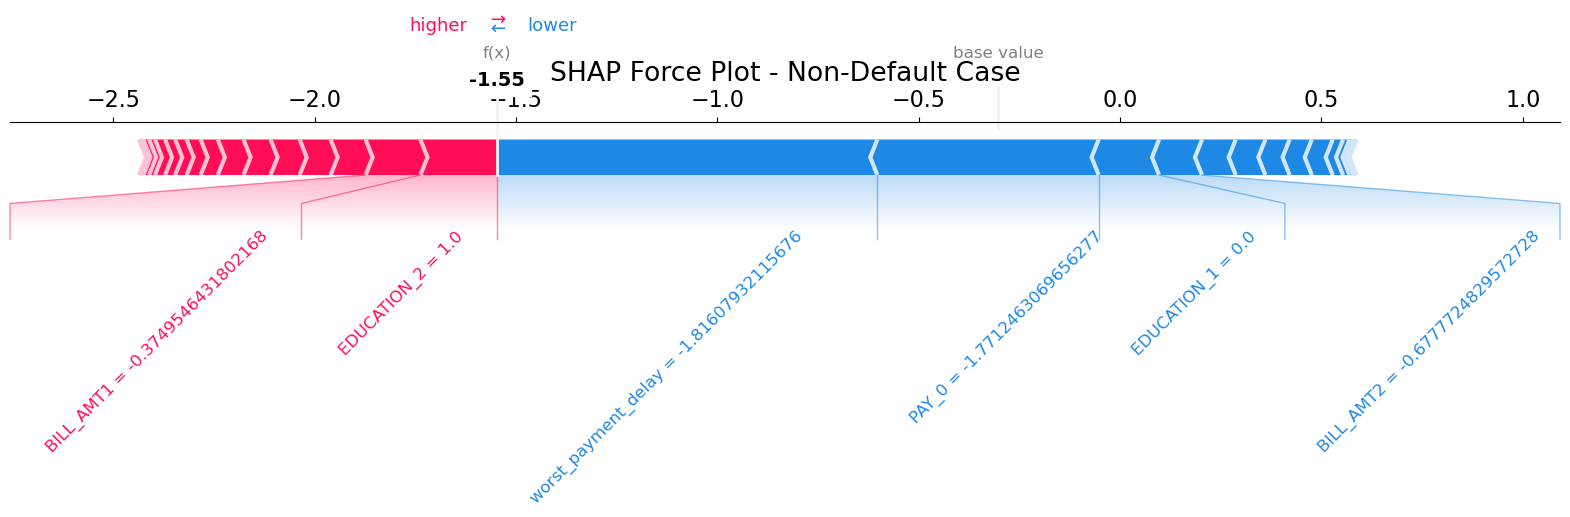

In [61]:
# Plot non-default case
plt.figure(figsize=(15, 5))
print("\nNon-Default Case (Prediction probability: {:.3f})".format(y_pred_proba[non_default_idx]))
shap.force_plot(
    lr_explainer.expected_value,
    shap_values[non_default_idx],
    X_test_transformed_df.iloc[non_default_idx],
    matplotlib=True,
    show=False,
    text_rotation=45,  # Rotate labels for better readability
    contribution_threshold=0.05  # Only show features with significant contributions
)
plt.title("SHAP Force Plot - Non-Default Case")
plt.tight_layout()
plt.show()

This plot shows a prediction strongly favoring non-default, with an f(x) value of -1.54. The key factors are:
Pushing against default (blue):

1. worst_payment_delay ≈ -1.82 indicates good payment history
2. PAY_0 ≈ -1.77 shows current good payment status
3. EDUCATION_1 = 0.0 and BILL_AMT2 suggest favorable education and billing patterns

Pushing towards default (red):

1. BILL_AMT1 being negative suggests potential credit risk
2. EDUCATION_2 = 1.0 indicates this education level has some default risk


In both cases, the payment history (PAY_0 and worst_payment_delay) are among the strongest predictors, but they push in opposite directions for these two contrasting examples. The education levels also play a significant role in both predictions, though their impact varies based on the specific category.

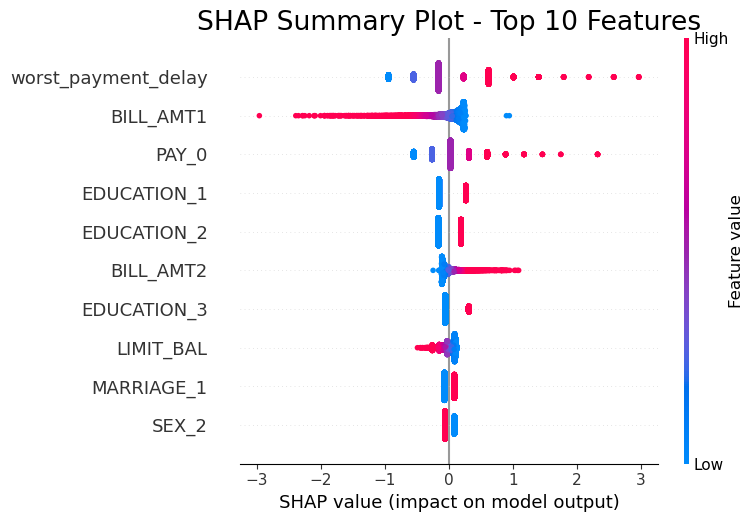

In [62]:
# Summary plot showing global feature importance
#For reference
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values,
    X_test_transformed_df,
    max_display=10,  # Show only top 10 features
    show=False
)
plt.title("SHAP Summary Plot - Top 10 Features")
plt.tight_layout()
plt.show()

This SHAP summary plot shows that payment-related features (worst_payment_delay and PAY_0) have the strongest impact on predicting credit default, followed by billing amounts (BILL_AMT1 and BILL_AMT2). Higher values of payment delays increase default risk , while higher current bill amounts (BILL_AMT1) decrease default risk but higher previous bill amounts (BILL_AMT2) increase it, suggesting that recent high spending capacity is a positive signal while lingering high bills indicate potential financial strain.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

1. table summarizing important results.

In [63]:
combined_scores

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.222 (+/- 0.011),0.227 (+/- 0.004)
Logistic regression,0.040 (+/- 0.003),0.004 (+/- 0.000),0.238 (+/- 0.023),0.236 (+/- 0.012)
Logistic regression_Balanced,0.045 (+/- 0.003),0.004 (+/- 0.000),0.653 (+/- 0.011),0.653 (+/- 0.003)
LR_Balanced_Tuned,0.047 (+/- 0.003),0.004 (+/- 0.000),0.654 (+/- 0.010),0.653 (+/- 0.003)
random forest,2.904 (+/- 0.015),0.045 (+/- 0.000),0.341 (+/- 0.009),1.000 (+/- 0.000)
K-Nearest Neighbors,0.011 (+/- 0.001),0.054 (+/- 0.009),0.363 (+/- 0.005),0.472 (+/- 0.005)
LightGBM,0.256 (+/- 0.010),0.007 (+/- 0.000),0.375 (+/- 0.013),0.457 (+/- 0.004)
LightGBM_balanced,0.255 (+/- 0.001),0.007 (+/- 0.000),0.620 (+/- 0.021),0.788 (+/- 0.007)
LR_Balanced_Selected,0.028 (+/- 0.005),0.001 (+/- 0.000),0.654 (+/- 0.011),0.654 (+/- 0.003)
Random Forest Selected (Tuned),3.592 (+/- 0.027),0.075 (+/- 0.001),0.487 (+/- 0.014),0.890 (+/- 0.009)


2. Write concluding remarks.

- First, our chosen LR_Balanced_Selected model demonstrates consistent and reliable performance with a validation recall of 0.654 and similar test recall of 0.648, striking a good balance between predictive power and computational efficiency. The model's stability is evidenced by nearly identical training and validation scores, suggesting robust generalization.

- Second, the benefits of balancing and feature selection are clear - they significantly improved performance over the base logistic regression model (from 0.238 to 0.654 recall) while maintaining fast fit and scoring times (0.027s and 0.001s respectively).

- While more complex models like Random Forest and KNN achieved higher training scores, they showed signs of overfitting and required substantially longer computation times.

- For deployment in a real-world credit default prediction system, our selected model offers a practical combination of reliable performance, reasonable computational cost, and interpretability. However, there's still room for potential improvement through feature engineering, alternative sampling methods, or exploring other balanced ensemble approaches.

3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability .

- First, we can implement stacking with logistic regression as a meta-learner or exploring cost-sensitive learning approaches instead of sampling could yield better results while maintaining interpretability.
- Second, we can try using XGBoost, which is known for its strong performance in classification tasks, especially with imbalanced datasets, could enhance predictive accuracy.
- Third, we want to try adjusting the decision threshold of the classification models, which could help optimize for metrics like recall or precision, depending on the specific costs associated with false positives or false negatives in the context of default prediction.

4. Report your final test score along with the metric you used at the top of this notebook in the Submission instructions section.


Best Model: Logistic regression with balanced class after hyperparameter optimization and feature selection

Best Test Score: 0.654

Metric: Recall

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

The biggest takeaway from the supervised machine learning material so far is the importance of thorough data preparation before diving into model building. Before starting on any tasks, it’s crucial to take the time to fully investigate the dataset, understand the features, and define the target variable clearly. Spending time upfront thinking about how to preprocess the data, what pipeline to use, and which model to build can save significant effort later on. Throughout the project, we noticed that we often had to go back to earlier steps, whether to correct preprocessing, revisit feature understanding, or clarify details about the data itself. This experience taught us that a well-thought-out initial exploration and planning phase can prevent a lot of rework and lead to more effective and efficient model development.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)